# Setup

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
sns.set_style("darkgrid")

In [41]:
df = pd.read_csv('./project_data.csv')
df

,age,b1,b2,c10,c3,c4,c8,dow,employment,i1,...,i5,marriage-status,month,n2,n3,n4,n5,n6,school,successful_sell
0,34,yes,no,no,False,new,NaN,fri,management,-1.8,...,5099.1,divorced,apr,2,530,999,0.001771,0,5 - a decent amount,no
1,28,yes,no,yes,False,new,NaN,thu,assistant,-1.8,...,5099.1,divorced,may,1,750,999,-1.673152,0,5 - a lot,yes
2,55,no,no,no,unknown,new,NaN,tue,leisure,1.4,...,5228.1,married,jul,3,600,999,0.927946,0,2 - a little bit,no
3,47,yes,no,no,False,new,NaN,mon,assistant,-0.1,...,5195.8,married,nov,1,860,999,0.203013,0,5 - a lot,no
4,49,no,no,no,unknown,new,NaN,tue,assistant,1.4,...,5228.1,married,jul,6,620,999,0.990804,0,5 - a lot,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,33,yes,no,no,False,old,NaN,mon,assistant,1.4,...,5228.1,married,jun,3,620,999,-0.050022,0,4 - average amount,no
41184,36,yes,no,no,False,old,NaN,mon,engineer,1.4,...,5228.1,married,jun,1,650,999,-2.310504,0,5 - a lot,no
41185,36,no,no,no,False,new,NaN,mon,engineer,1.4,...,5228.1,divorced,jul,3,620,999,2.144238,0,5 - a decent amount,no
41186,50,no,no,no,False,old,NaN,fri,hobbyist,1.4,...,5228.1,married,jun,2,880,999,0.359144,0,1 - almost none,no


### columns have correct dtypes?

In [3]:
for column in df.columns:
    print('---')
    print(f'column: {column}')
    print(f'dtype: {df[column].dtype}')
    print(df[column].value_counts())
    print('number of nulls: ', df[column].isna().sum())
    print()
    

---
column: age
dtype: int64
age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
89       2
95       1
94       1
87       1
Name: count, Length: 78, dtype: int64
number of nulls:  0

---
column: b1
dtype: object
b1
yes    21576
no     18622
-1       990
Name: count, dtype: int64
number of nulls:  0

---
column: b2
dtype: object
b2
no     33950
yes     6248
Name: count, dtype: int64
number of nulls:  990

---
column: c10
dtype: object
c10
no     36548
yes     4640
Name: count, dtype: int64
number of nulls:  0

---
column: c3
dtype: object
c3
False      32588
unknown     8597
True           3
Name: count, dtype: int64
number of nulls:  0

---
column: c4
dtype: object
c4
new    26144
old    15044
Name: count, dtype: int64
number of nulls:  0

---
column: c8
dtype: object
c8
no     4252
yes    1373
Name: count, dtype: int64
number of nulls:  35563

---
column: dow
dtype: object
dow
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype:

### correcly parse NA and cast data to the correct dtype

In [42]:
### replace with nan
df['b1'] = df['b1'].replace('-1', np.nan)
df['c3'] = df['c3'].replace('unknown', np.nan)

### cast to boolean
df['b1'] = df['b1'].map({'yes': True, 'no': False}).astype('boolean')
df['b2'] = df['b2'].map({'yes': True, 'no': False}).astype('boolean')
df['c10'] = df['c10'].map({'yes': True, 'no': False}).astype('boolean')
df['c8'] = df['c8'].map({'yes': True, 'no': False}).astype('boolean')
df['c3'] = df['c3'].map({'True': True, 'False': False}).astype('boolean')
df['successful_sell'] = df['successful_sell'].map({'yes': True, 'no': False}).astype('boolean')

### categorical columns
df['c4'] = df['c4'].astype('category')
df['employment'] = df['employment'].astype('category')
df['marriage-status'] = df['marriage-status'].astype('category')

### day/month also converted to categorical
df['dow'] = pd.Categorical(df['dow'], categories = ['mon', 'tue', 'wed', 'thu', 'fri'], ordered = True)
df['month'] = pd.Categorical(df['month'], categories = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ordered = True)

### ordinal columns
df['school_numeric'] = df['school'].apply(lambda x: int(x[0]) if pd.notnull(x) else np.nan).astype('Int64')

### cast successful_sell to numeric to calculate correlations 
df['successful_sell_numeric'] = df['successful_sell'].apply(lambda x: 1 if x is True else 0 if x is False else np.nan).astype('Int64')



# correlations

### numeric columns

In [6]:
numeric_cols = ['age', 'i1', 'i2', 'i3', 'i4', 'i5', 'n2', 'n3', 'n4', 'n5', 'n6', 'school_numeric', 'successful_sell_numeric']

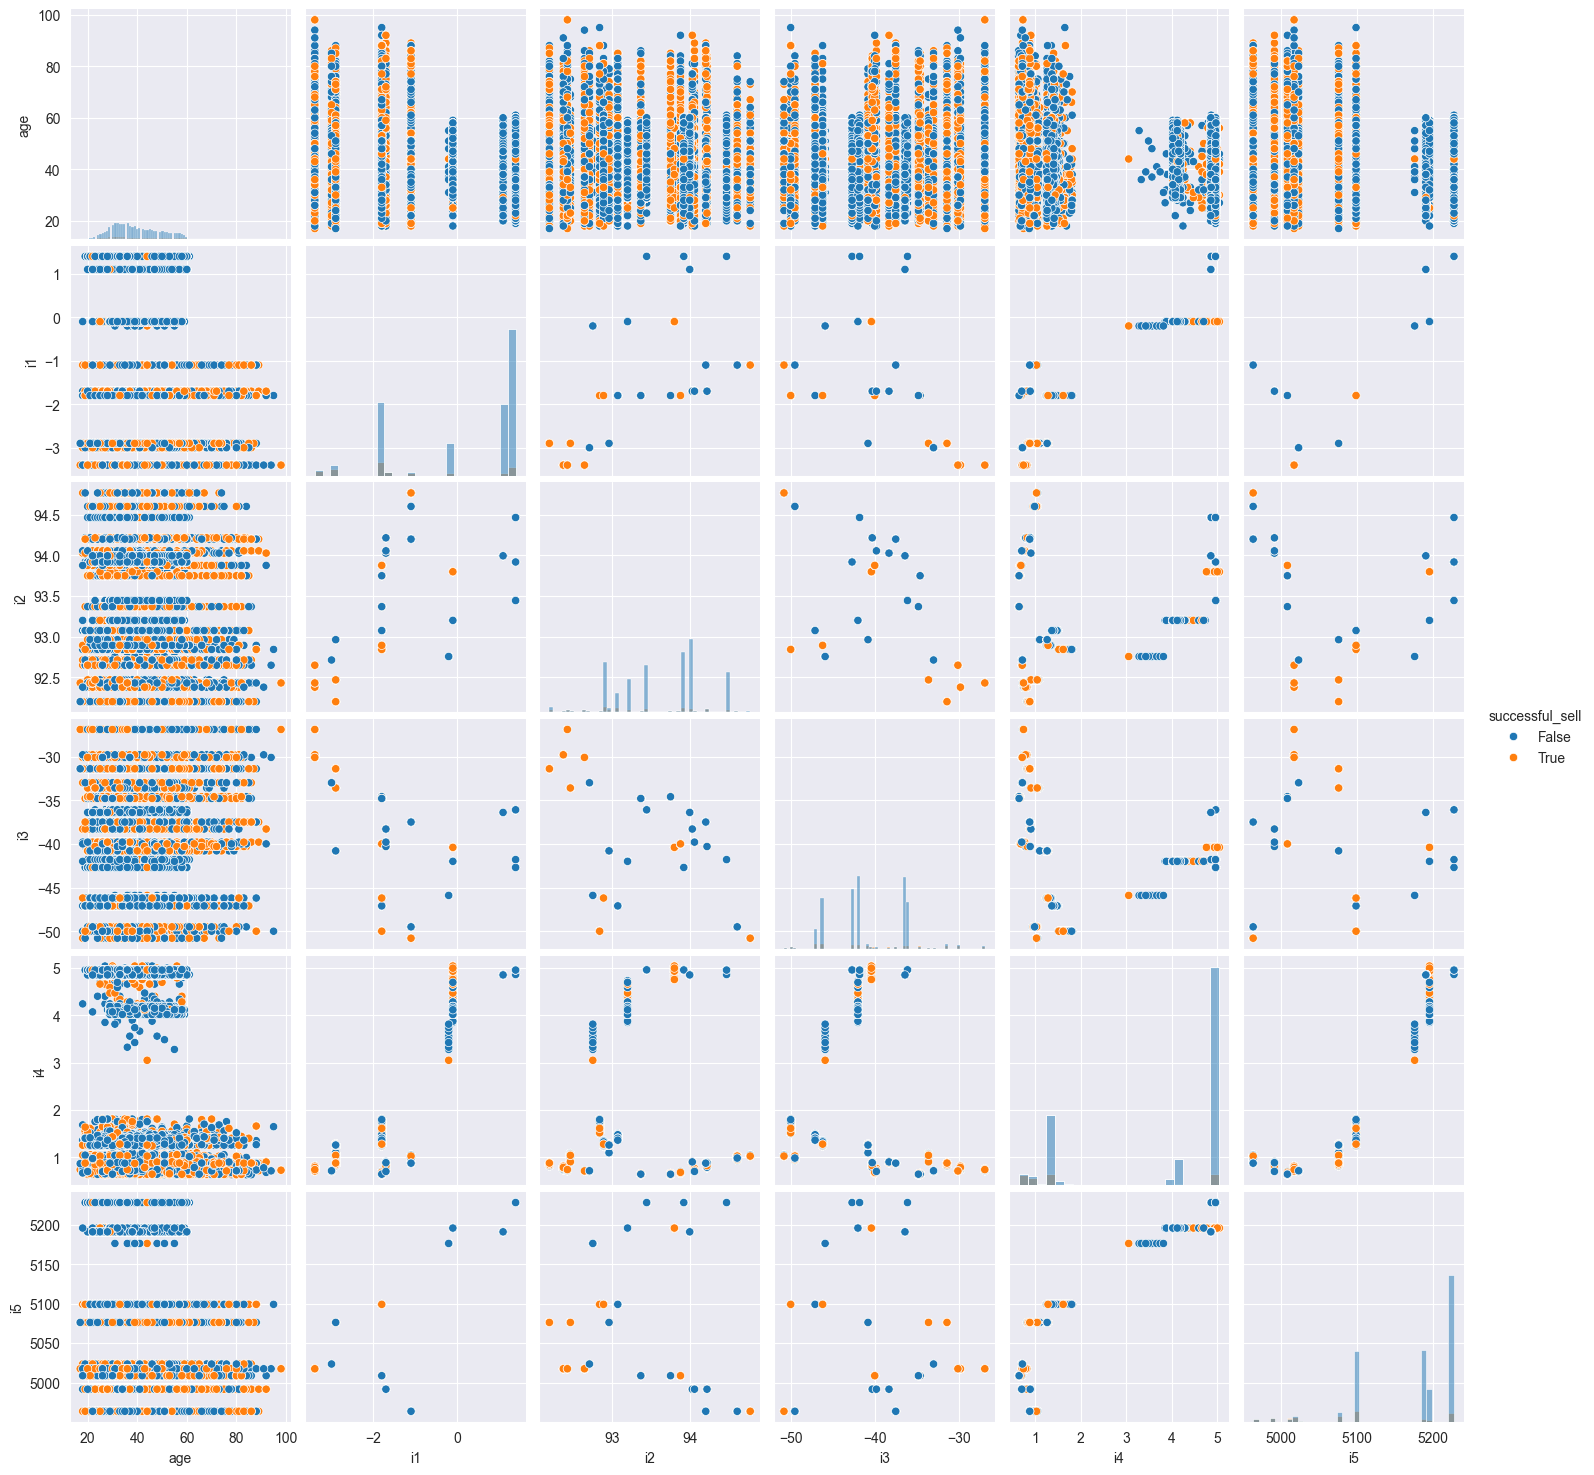

In [7]:
sns.pairplot(df[['age', 'i1', 'i2', 'i3', 'i4', 'i5', 'successful_sell']], hue='successful_sell', diag_kind="hist")

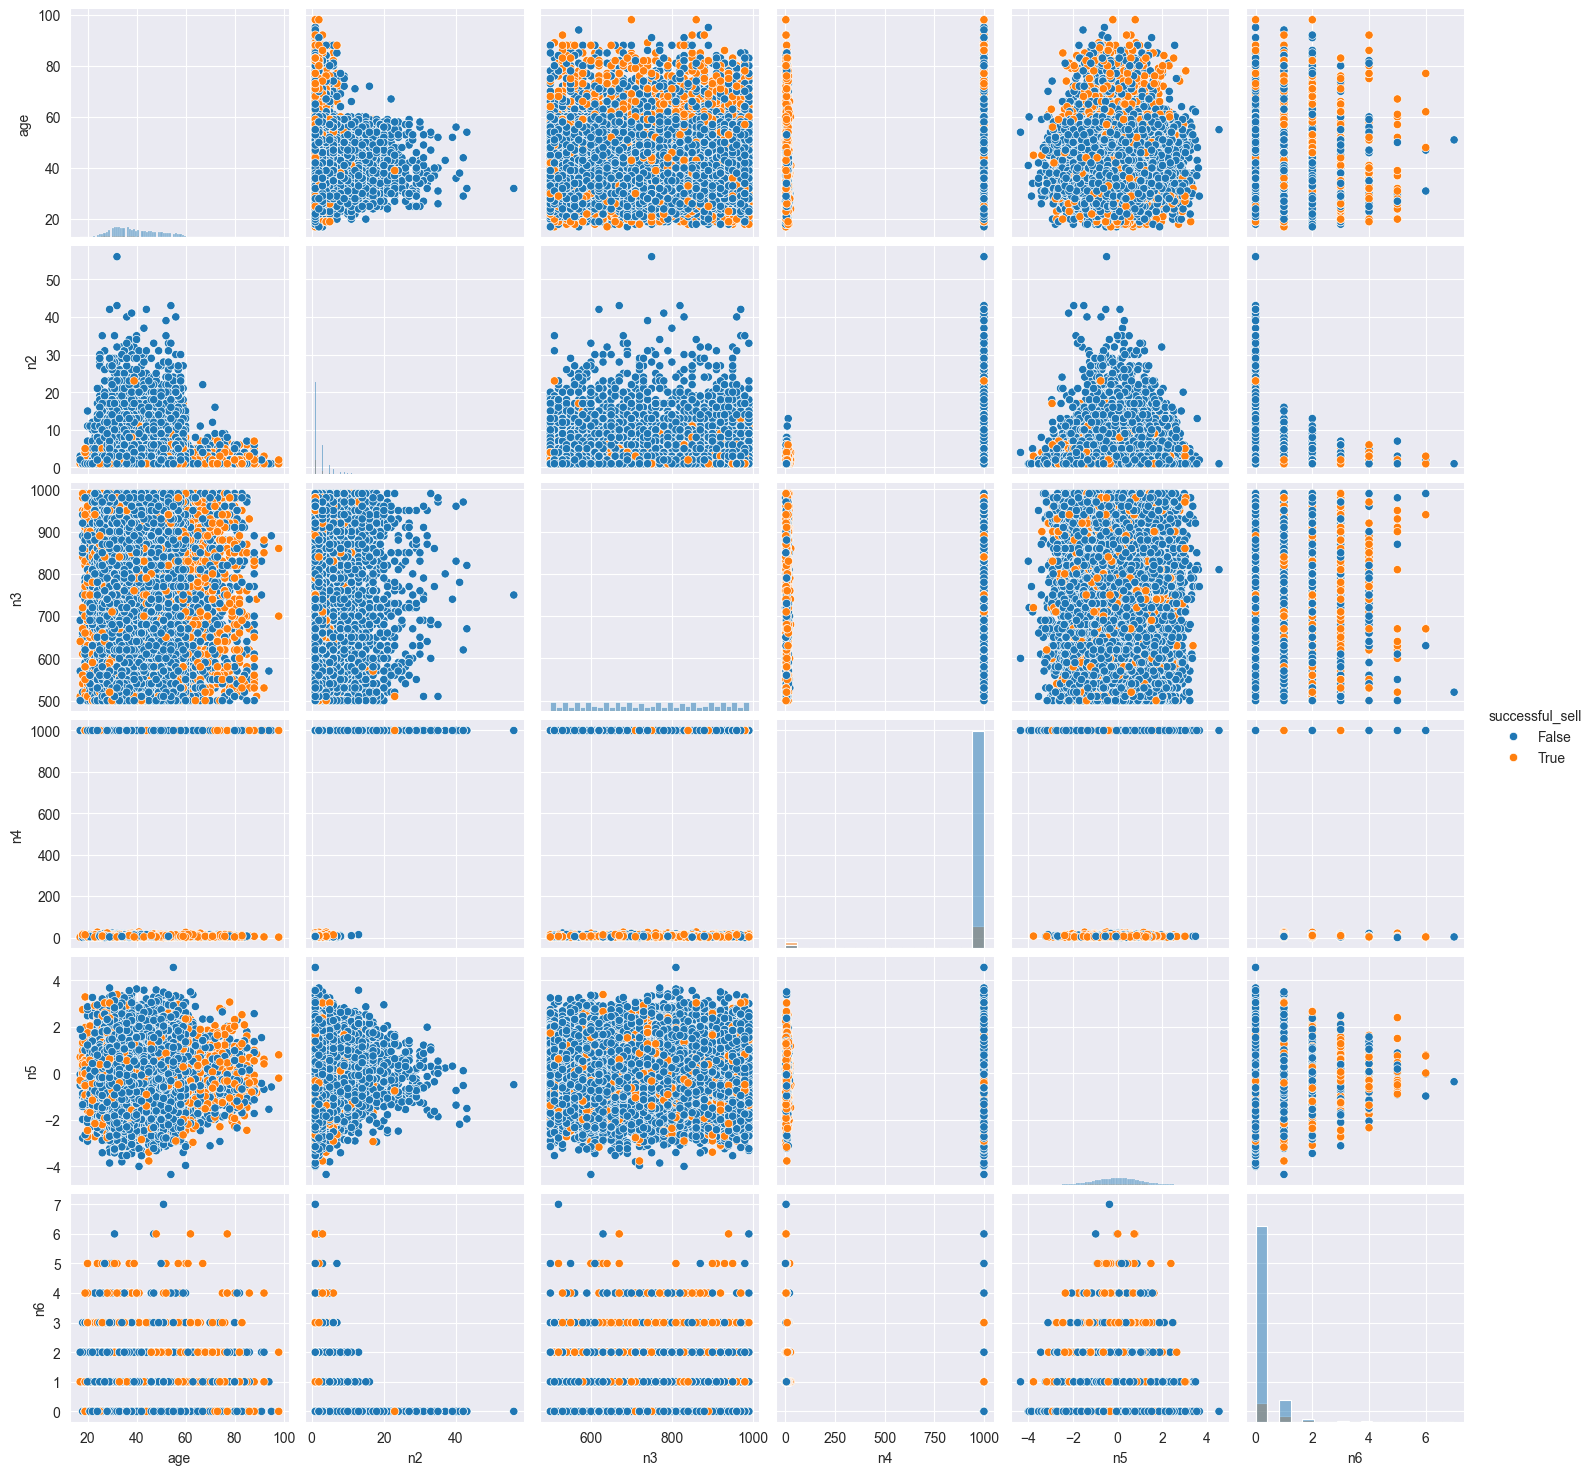

In [8]:
sns.pairplot(df[['age', 'n2', 'n3', 'n4', 'n5', 'n6', 'successful_sell']], hue='successful_sell', diag_kind="hist")


i1, i4, i5 seem to be highly correlated

<Axes: >

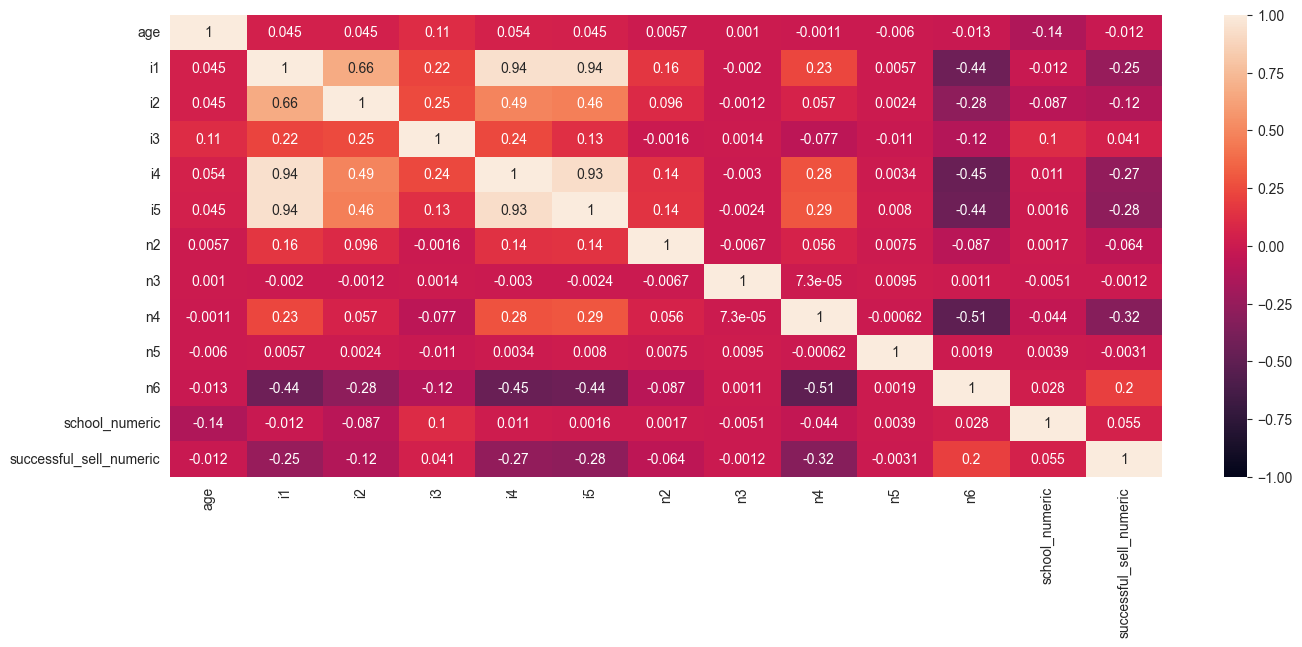

In [10]:
plt.figure(figsize=(16, 6))

sns.heatmap(df[numeric_cols].corr(method='spearman'), annot=True, vmin=-1, vmax=1)

the variables that correlate the most with successful_sell are:
- n4, n6
- i1, i4, i5 

<Axes: >

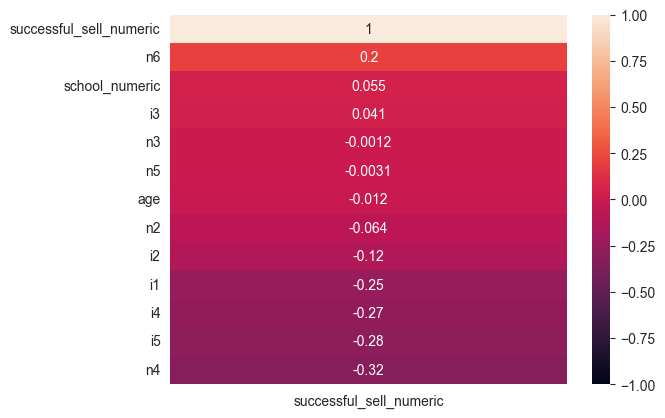

In [43]:
sns.heatmap(df[numeric_cols].corr(method='spearman')[['successful_sell_numeric']].sort_values(by='successful_sell_numeric', ascending=False), annot=True, vmin=-1, vmax=1)

n3 and n5 seems to be uniform and random noise respectively. they show no correlation with the other variables or the target

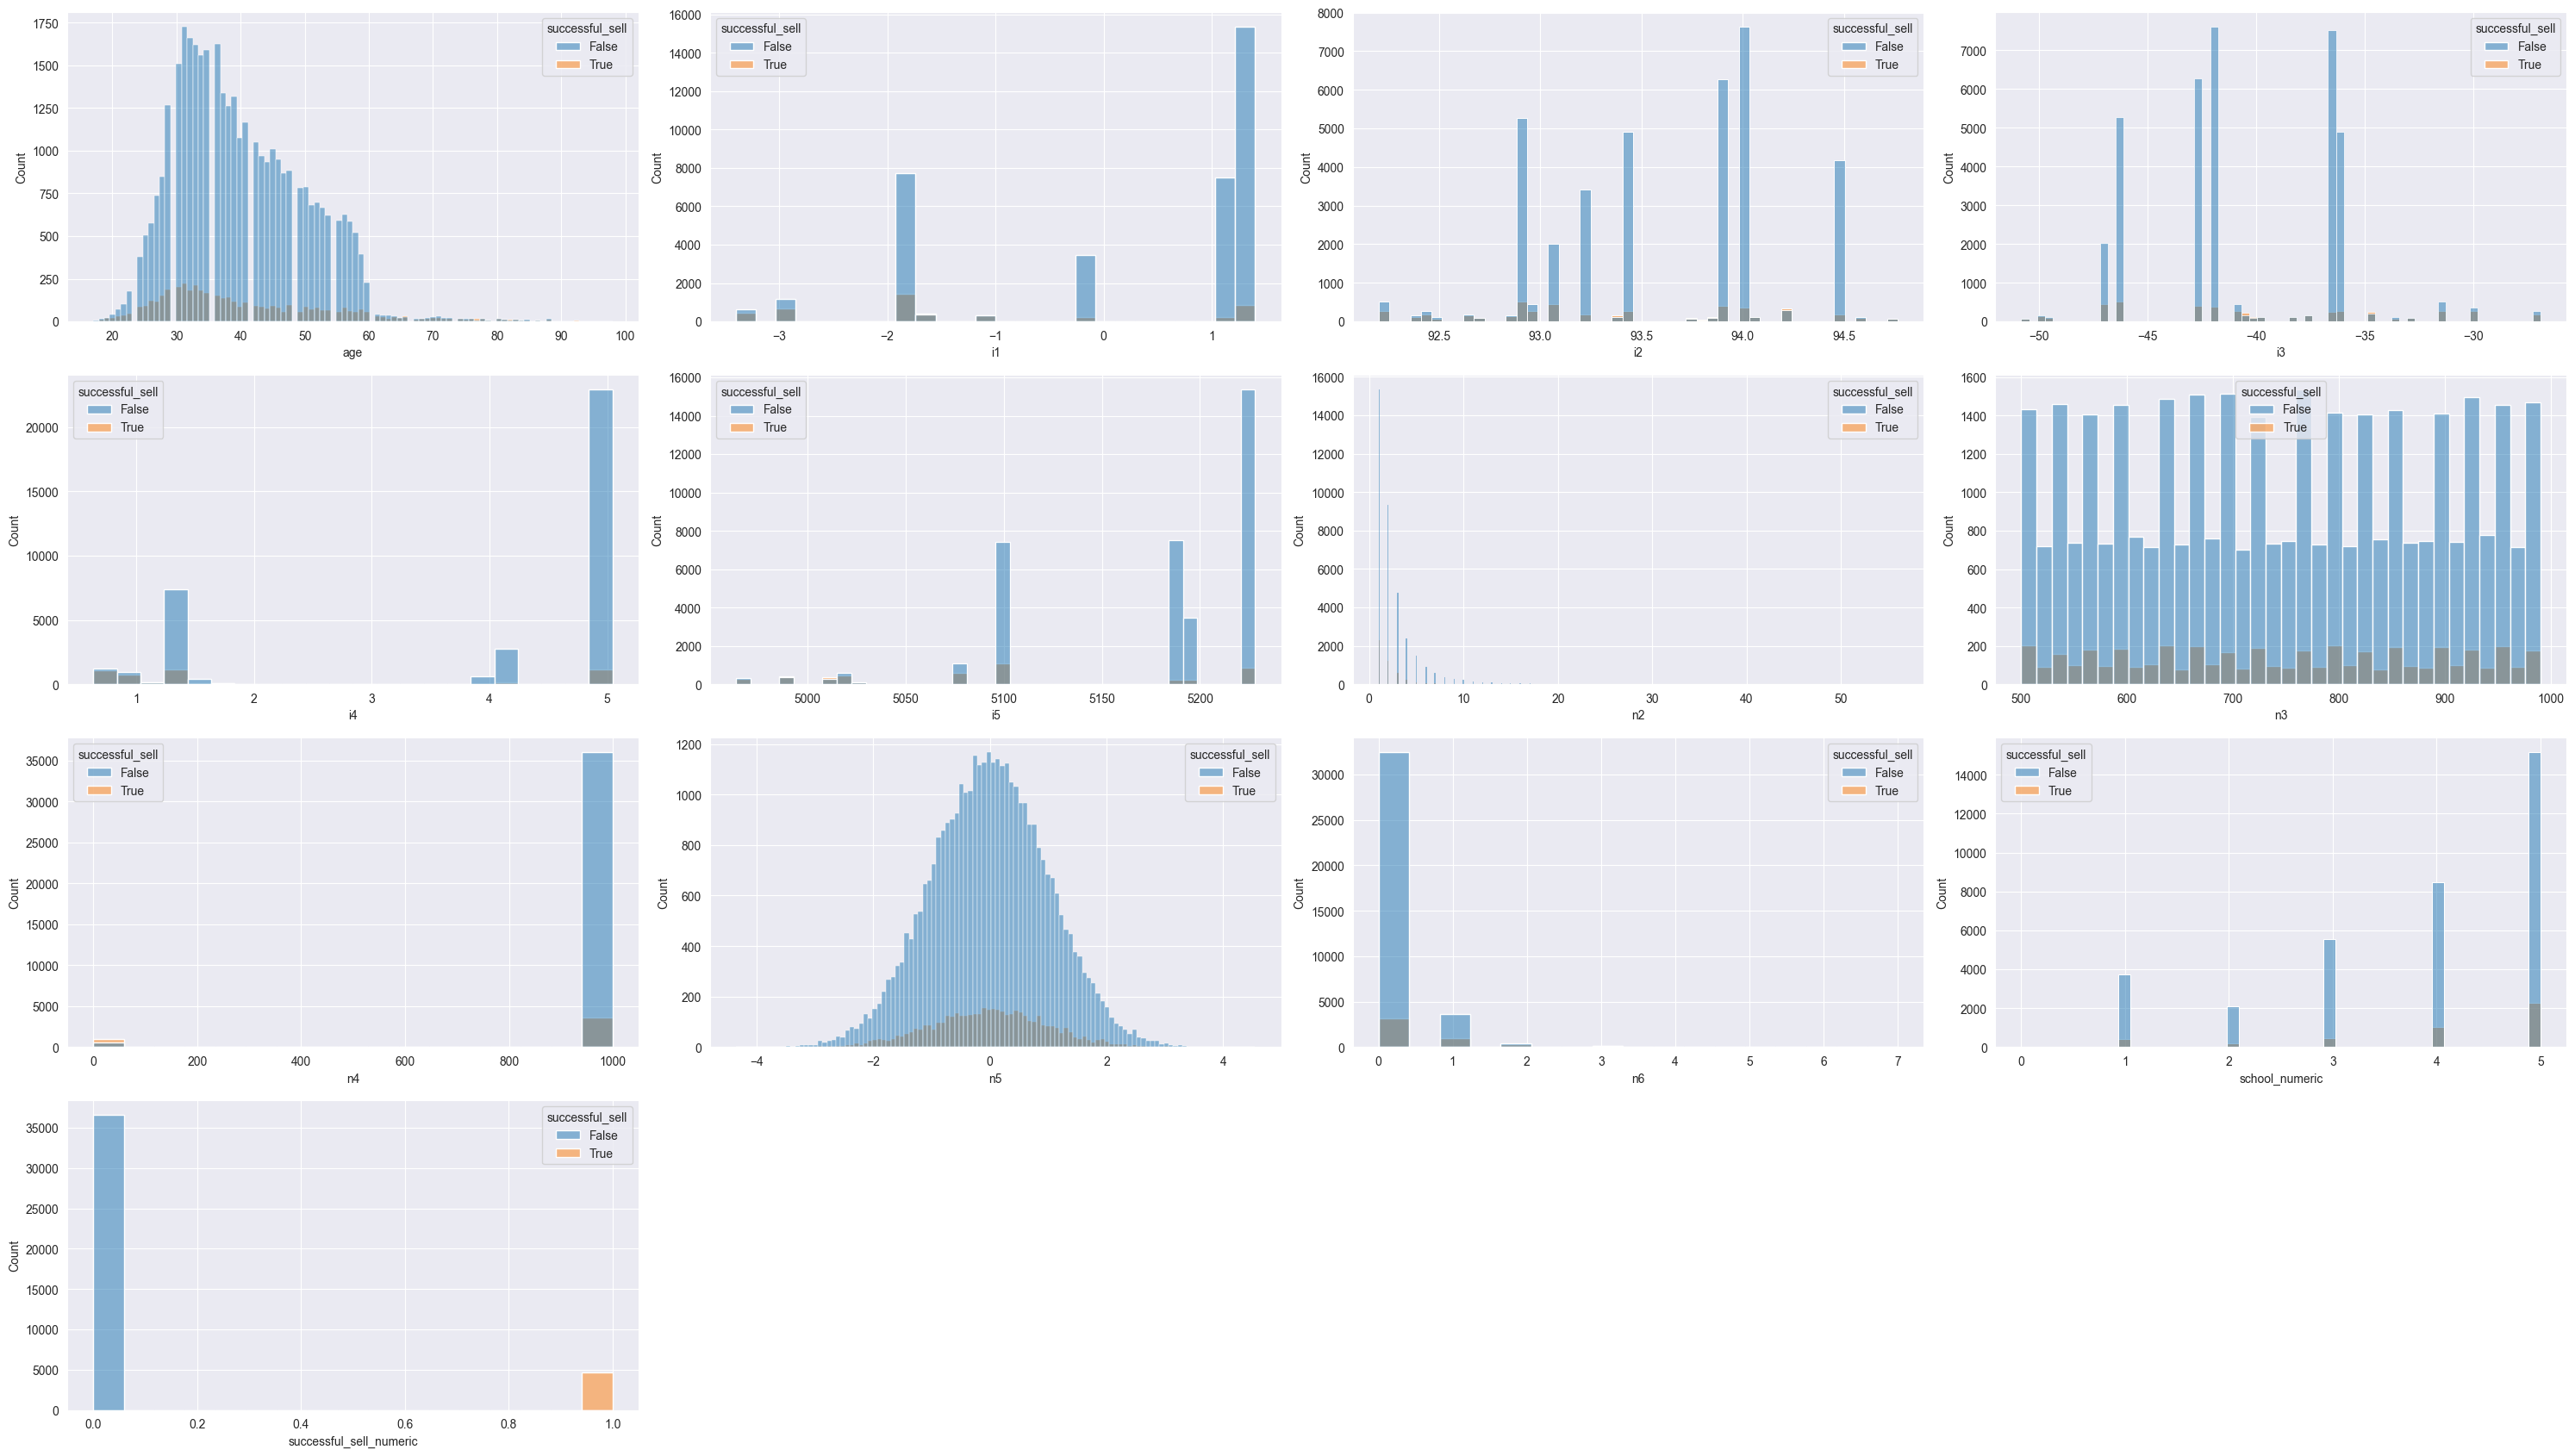

In [44]:
def plot_histogram_grid(columns):
    fig=plt.figure(figsize=(30,25))
    for i, feature in enumerate(columns):
        ax=fig.add_subplot(6, 4, i+1)
        sns.histplot(df, x=feature, hue='successful_sell')

    fig.tight_layout()  
    plt.show()

plot_histogram_grid(numeric_cols)

### boolean variables

In [46]:
boolean_cols = ['b1', 'b2', 'c10', 'c3', 'c8']

we can see c10 actually exactly coincides with the target variable. this is probably unintentional and shouldn't be used as an input feature

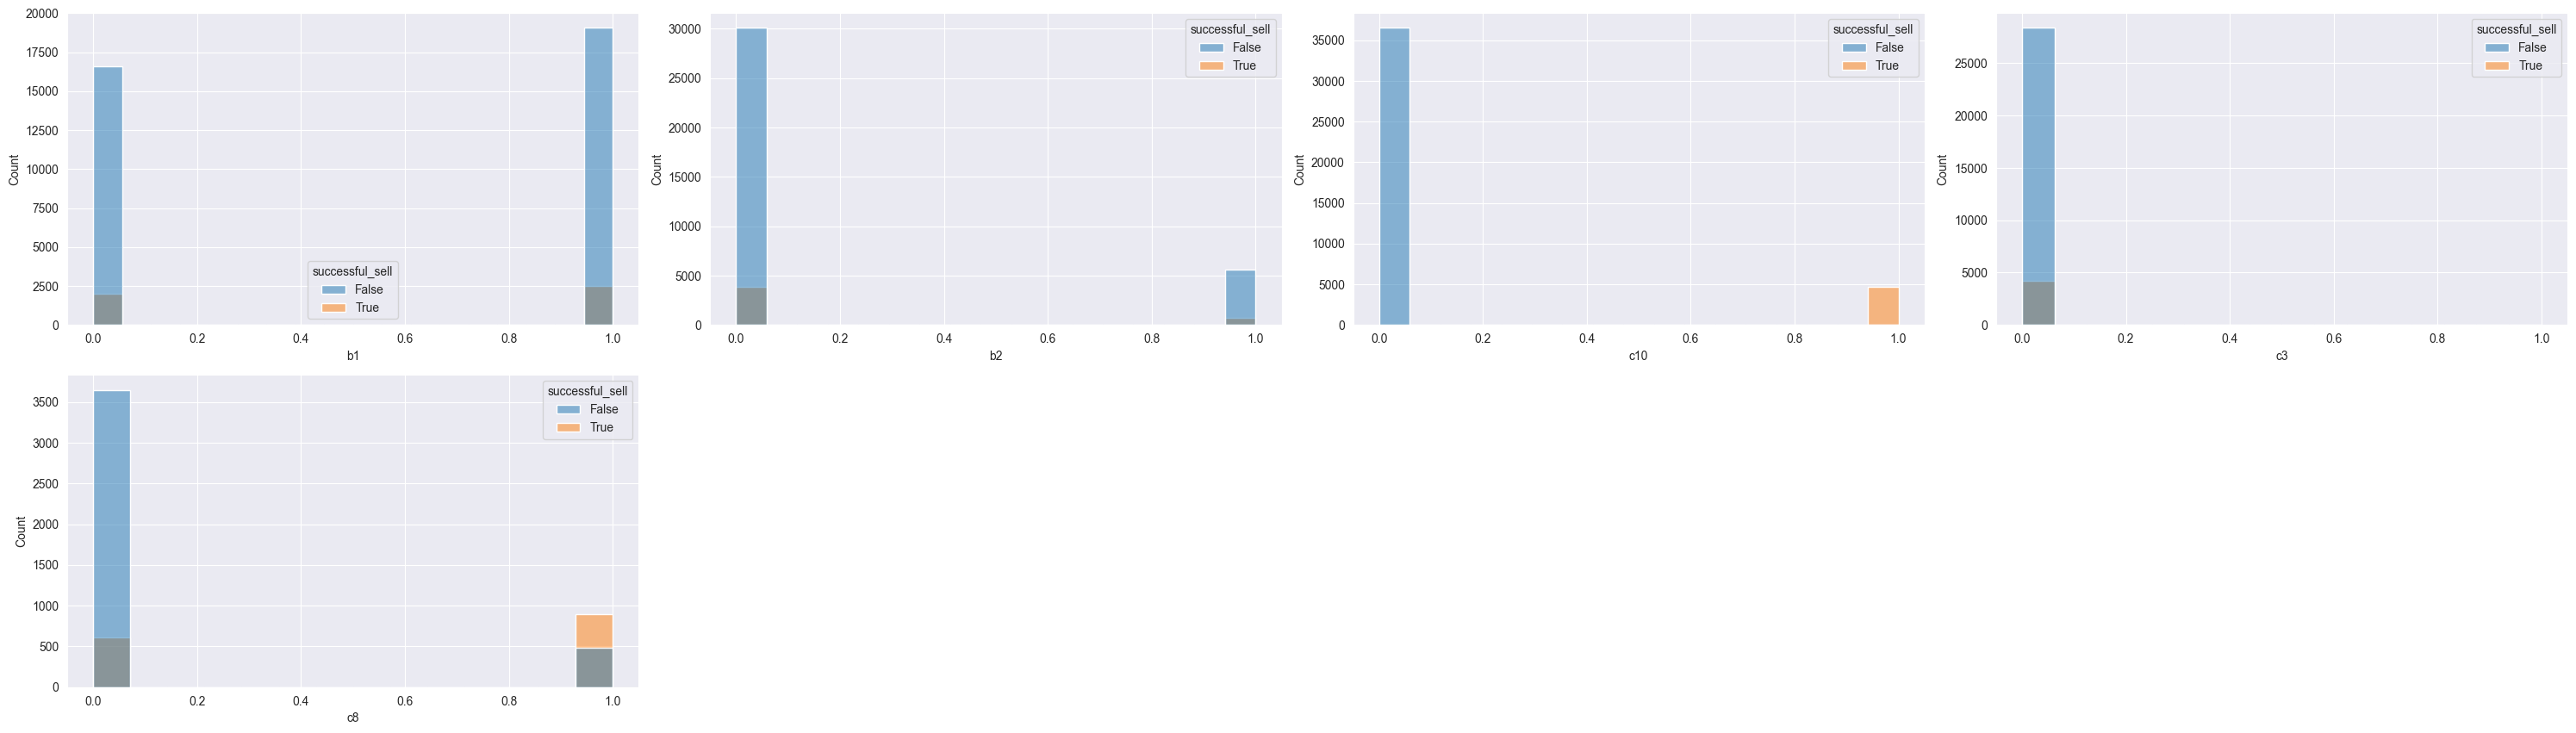

In [47]:
plot_histogram_grid(boolean_cols)

besides c10, c8 shows very promising as an input feature

<Axes: >

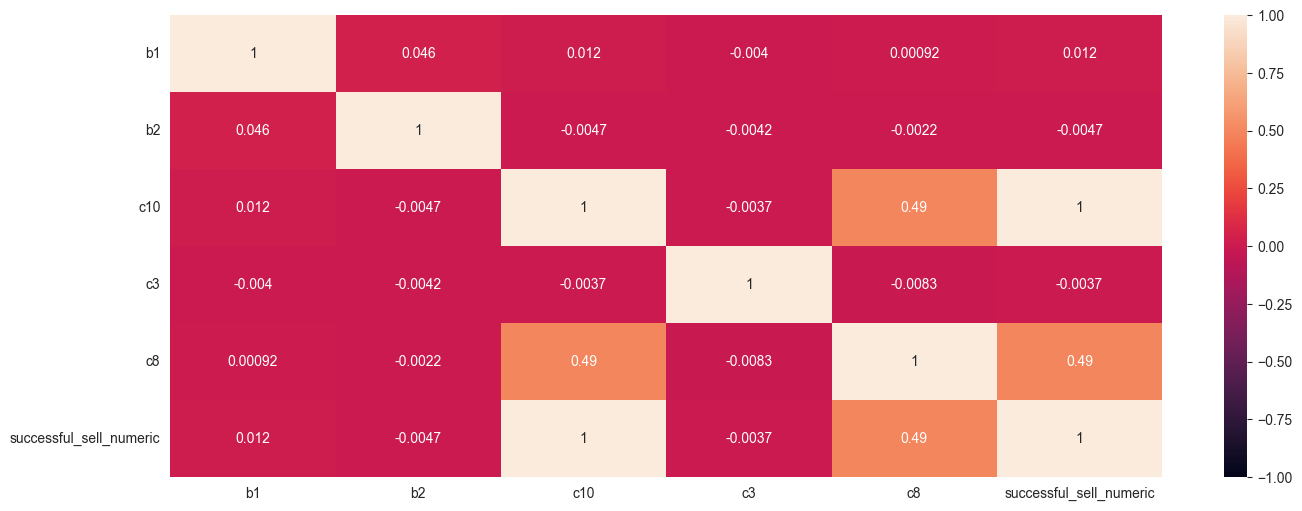

In [15]:
plt.figure(figsize=(16, 6))

sns.heatmap(df[boolean_cols + ['successful_sell_numeric']].corr(), annot=True, vmin=-1, vmax=1)

### categorical variables

In [48]:
categorical_cols = ['dow', 'month', 'c4', 'employment', 'marriage-status', 'successful_sell']

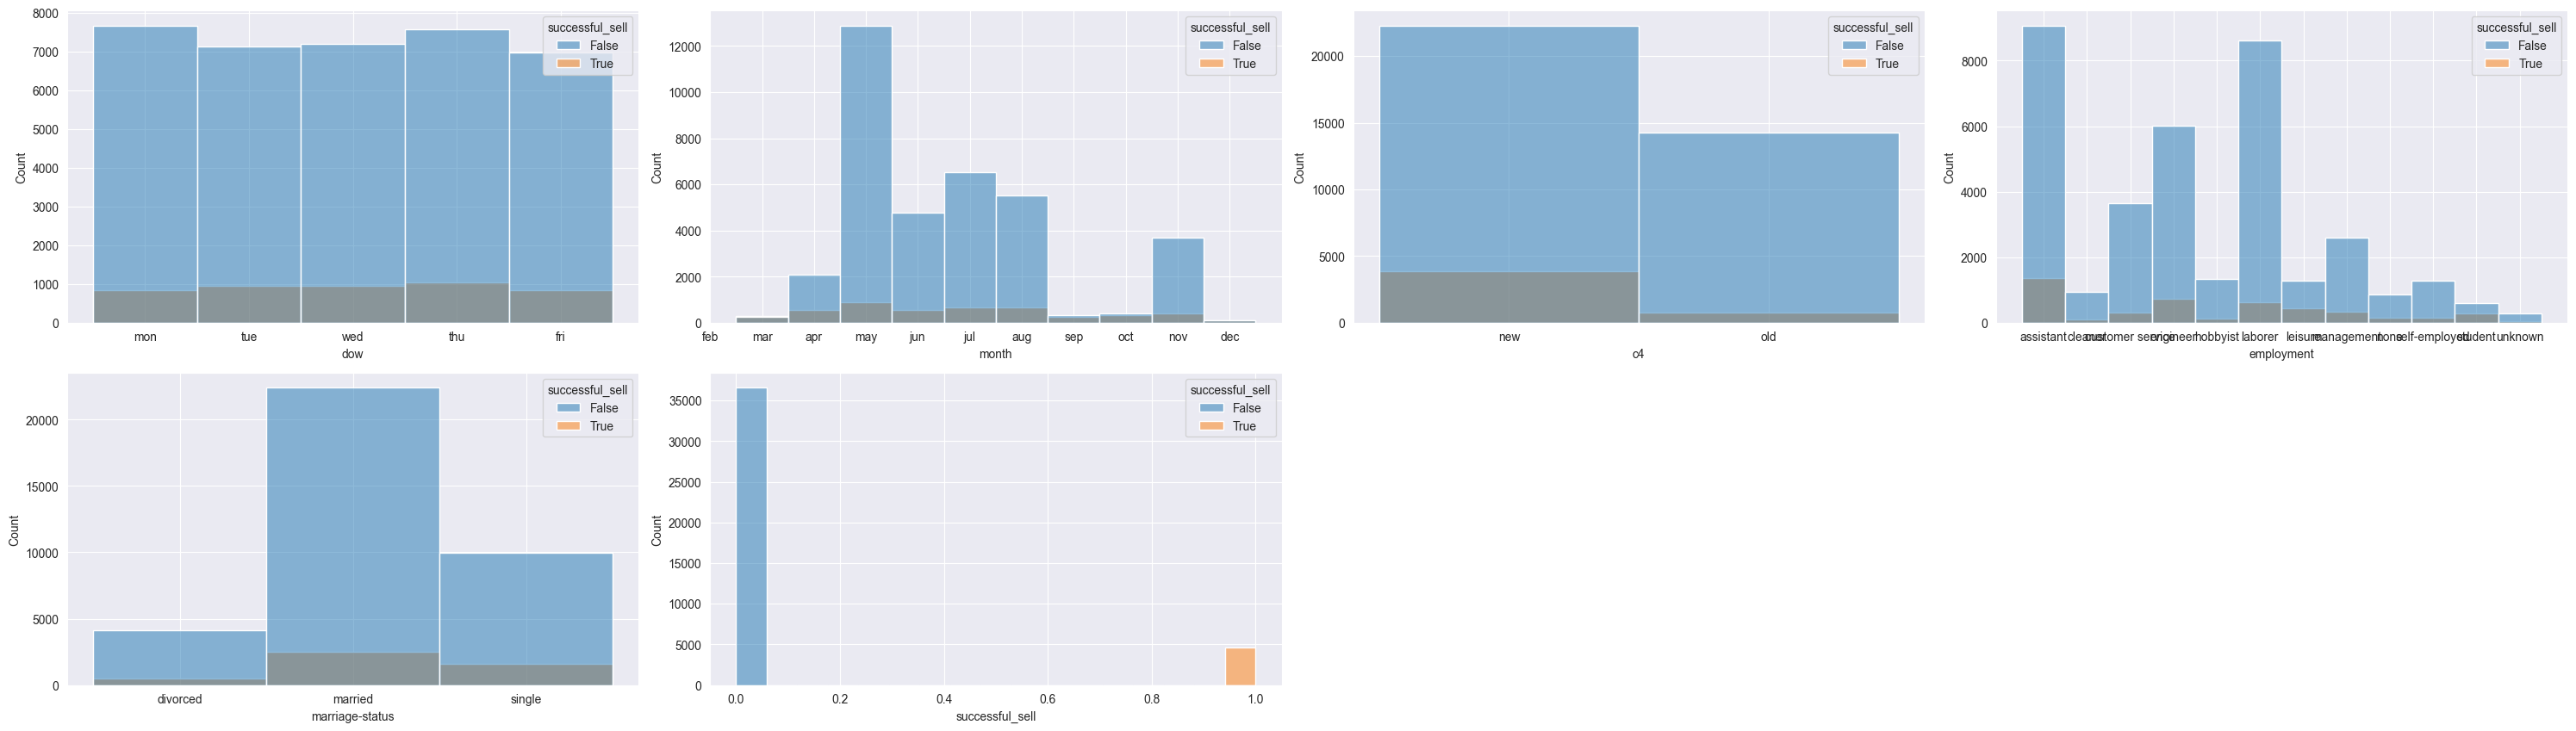

In [49]:
plot_histogram_grid(categorical_cols)

calculate cramers's v for categorical-continuous correlation

on the categorical side, month, c4, employment could be used as input features

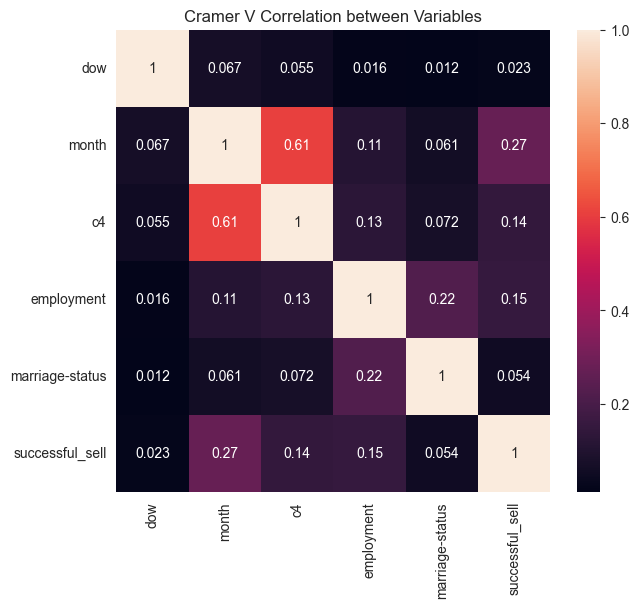

In [18]:
import scipy.stats as ss
import itertools

# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


corrM = np.zeros((len(categorical_cols),len(categorical_cols)))

for col in categorical_cols:
    idx = categorical_cols.index(col)
    corrM[idx, idx] = cramers_v(pd.crosstab(df[col], df[col]))

for col1, col2 in itertools.combinations(categorical_cols, 2):
    idx1, idx2 = categorical_cols.index(col1), categorical_cols.index(col2)
    corrM[idx1, idx2] = cramers_v(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=categorical_cols, columns=categorical_cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");


# Modeling

### Business metric

We first need a performance metric to evaluate our classifiers. 

Let's assume we're going to act on our predictions by reaching our to the users and try to sell the tax software. 
If selling a copy of the software licence to a given user has a revenue R, but the operational cost to reach out is C (this cost might be e.g. running an ad campaign, opex, etc)
then the net profit will be: 
    
`TP*R - C(TP+FP)`

where `TP` is the number of users correctly classified as `successful_sell=True` (true positive)

`TP+FP` is the total number of users classified as positive (True positives + False positives)

we can calculate the profit per user by dividing by the population size `N`

we can also rescale this metric from 0 to 1, where 0 means the worst possible classifier (maximize loss), and 1 means the perfect classifier (maximize profit)

In [20]:
def make_revenue_scoring(R=100, C=10, normalized=False):

    def revenue_scoring(y_true, y_pred, **kwargs):
        TP = ((y_true ==  y_pred) & (y_true == 1)).sum()
        TN = ((y_true ==  y_pred) & (y_true == 0)).sum()
        FP = ((y_true !=  y_pred) & (y_pred == 1)).sum()
        FN = ((y_true !=  y_pred) & (y_pred == 0)).sum()

        N = (TP + TN + FP + FN)
        profit = (TP*R - C*(TP+FP)) / N
        
        if normalized:
            max_profit = (TP+FN)*(R-C) / N
            min_profit = C*(FP + TN) / N
            
            # linearly rescale profit from 0 to 1
            return (profit + min_profit) / (max_profit + min_profit)
        
        return profit

    
    return revenue_scoring


In [19]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer, TargetEncoder, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, BaggingClassifier, StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
from sklearn.base import TransformerMixin
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklego.meta import Thresholder
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC


first we declare a preprocessing pipeline including:
- handling missing data
- rescaling
- encoding categorical / boolean data

In [50]:
numerical_cols = ["age", "i1", "n4", "n6", 'i4', 'i5']
categorical_cols = ["employment", "month", 'c4']
boolean_cols = ['c8']
ordinal_cols = ['school_numeric']

all_features = numerical_cols + categorical_cols + boolean_cols + ordinal_cols

X = df[all_features]
y = df["successful_sell_numeric"]


# -----

numeric_transformer = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    # KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform', subsample=None),
)

categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown='ignore', sparse_output=False), # mb try ordinal or target encoding
    # TargetEncoder()
)

boolean_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-1, missing_values=pd.NA),
    SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan),
    OrdinalEncoder() # opposed to targetencoding, onehot
)

ordinal_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value=-1, missing_values=pd.NA),
    SimpleImputer(strategy='constant', fill_value=-1, missing_values=np.nan),
)

preprocessor = make_column_transformer(
    (numeric_transformer, numerical_cols),
    (categorical_transformer, categorical_cols),
    (boolean_transformer, boolean_cols),
    (ordinal_transformer, ordinal_cols)
)


preprocessor.set_output(transform='pandas')


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'i1', 'n4', 'n6', 'i4', 'i5']),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['employment', 'month', 'c4']),
                                ('pipeline-3',
                                 Pipeline(step...
                                                                missing_values=<NA>,
                                                                strategy='constant')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['c8']),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer-1',
                                                  SimpleImputer(fill_value=-1,
                                                                missing_values=<NA>,
                                                                strategy='constant')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(fill_value=-1,
                                                                strategy='constant'))]),
                                 ['school_numeric'])])

we train and evaluate the performance of several models using cross-validation

In [53]:
## calculate several performance metrics
scoring = {
        'accuracy': 'accuracy', 
        'precision': 'precision', 
        'recall': 'recall', 
        'f1': 'f1', 
        'profit_100_11': make_scorer(make_revenue_scoring(R=100, C=11.2654), greater_is_better=True),
        'profit_100_11_norm': make_scorer(make_revenue_scoring(R=100, C=11.2654, normalized=True), greater_is_better=True),
        'profit_100_90': make_scorer(make_revenue_scoring(R=100, C=90), greater_is_better=True),
        'profit_100_90_norm': make_scorer(make_revenue_scoring(R=100, C=90, normalized=True), greater_is_better=True),
}


models = [
    ('Dummy_all_false', DummyClassifier(strategy='most_frequent')),
    ('Dummy_all_true', DummyClassifier(strategy='constant', constant=1)),
    ('HistGradientBoostingClassifier', HistGradientBoostingClassifier()),
    ('RandomForestClassifier(n_estimators=100)', RandomForestClassifier(n_estimators=100)),
    ('RandomForestClassifier(n_estimators=200)', RandomForestClassifier(n_estimators=200)),
    ('RandomForestClassifier(n_estimators=300)', RandomForestClassifier(n_estimators=300)),
    ('BaggingClassifier', BaggingClassifier()),
    ('SVC', SVC()),
    ('LinearSVC', LinearSVC()),
    ('LogisticRegression', LogisticRegression()),
    ('LogisticRegressionL1', LogisticRegression(penalty='l1', solver='liblinear')),
    ('RidgeClassifier', RidgeClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('XGBClassifier_0.1', Thresholder(XGBClassifier(), 0.1)),
    ('XGBClassifier_0.15', Thresholder(XGBClassifier(), 0.15)),
    ('XGBClassifier_0.2', Thresholder(XGBClassifier(), 0.2)),
    ('XGBClassifier_0.25',  Thresholder(XGBClassifier(), 0.25)),
]


def evaluate_models(models):
    
    results = []

    for model_name, model in models:

        pipeline = Pipeline(
            steps=[
                ("preprocessor", preprocessor),
                ("classifier", model)
            ]
        )

        # uses stratified kfold
        scores = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)
        mean_scores = {k: v.mean() for k,v in scores.items()}
        results.append({**{'name': model_name}, **mean_scores}) 

    return pd.DataFrame(results).drop(columns=['fit_time', 'score_time'])


evaluate_models(models)

/Users/fede/.pyenv/versions/3.10.4/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fede/.pyenv/versions/3.10.4/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/fede/.pyenv/versions/3.10.4/envs/ml/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

,name,test_accuracy,test_precision,test_recall,test_f1,test_profit_100_11,test_profit_100_11_norm,test_profit_100_90,test_profit_100_90_norm
0,Dummy_all_false,0.887346,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.986090
1,Dummy_all_true,0.112654,0.112654,1.000000,0.202496,0.000017,0.500000,-78.734583,0.013910
2,HistGradientBoostingClassifier,0.899971,0.643701,0.253233,0.363051,2.352246,0.617655,-1.145953,0.971940
3,RandomForestClassifier(n_estimators=100),0.882830,0.470130,0.312716,0.375511,2.678267,0.633962,-3.224718,0.946273
4,RandomForestClassifier(n_estimators=200),0.882660,0.469138,0.314440,0.376456,2.691399,0.634619,-3.255553,0.945892
5,RandomForestClassifier(n_estimators=300),0.882611,0.468467,0.312284,0.374605,2.672042,0.633651,-3.240500,0.946078
6,BaggingClassifier,0.879455,0.446586,0.294828,0.355064,2.484140,0.624252,-3.367236,0.944513
7,SVC,0.899291,0.686483,0.195690,0.304283,1.842398,0.592153,-0.688544,0.977588
8,LinearSVC,0.899655,0.686346,0.202155,0.311979,1.902927,0.595181,-0.714037,0.977273
9,LogisticRegression,0.899752,0.669011,0.219397,0.330031,2.054488,0.602762,-0.860680,0.975463


In [56]:
def threshold_search(base_model, threshold_range):

    results = []
    for threshold in threshold_range:
        model = Thresholder(base_model, threshold)

        pipeline = Pipeline(
            steps=[
                ("preprocessor", preprocessor),
                ("classifier", model)
            ]
        )

        scores = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)
        mean_scores = {k: v.mean() for k,v in scores.items()}
        results.append({'threshold': threshold, **mean_scores})

    return pd.DataFrame(results).drop(columns=['fit_time', 'score_time'])

xgb_threshold = threshold_search(XGBClassifier(), np.arange(0,0.4, 0.015).round(3))
xgb_threshold


,threshold,test_accuracy,test_precision,test_recall,test_f1,test_profit_100_11,test_profit_100_11_norm,test_profit_100_90,test_profit_100_90_norm
0,0.000,0.112654,0.112654,1.000000,0.202496,0.000017,0.500000,-78.734583,0.013910
1,0.015,0.147713,0.115748,0.988793,0.207235,0.297161,0.514863,-75.478311,0.054117
2,0.030,0.319584,0.133955,0.921983,0.233914,1.650288,0.582544,-59.407808,0.252549
3,0.045,0.510125,0.167410,0.842672,0.279320,3.104646,0.655289,-41.544357,0.473119
4,0.060,0.640599,0.206220,0.768750,0.325181,3.929360,0.696540,-29.135435,0.626338
5,0.075,0.730188,0.253074,0.714871,0.373778,4.468403,0.723502,-20.586836,0.731893
6,0.090,0.781490,0.294512,0.673060,0.409709,4.681445,0.734158,-15.592895,0.793556
7,0.105,0.814728,0.333343,0.643966,0.439213,4.801963,0.740186,-12.339276,0.833730
8,0.120,0.835850,0.366017,0.624353,0.461435,4.868760,0.743527,-10.261485,0.859386
9,0.135,0.849616,0.391646,0.605388,0.475566,4.858326,0.743005,-8.851603,0.876794


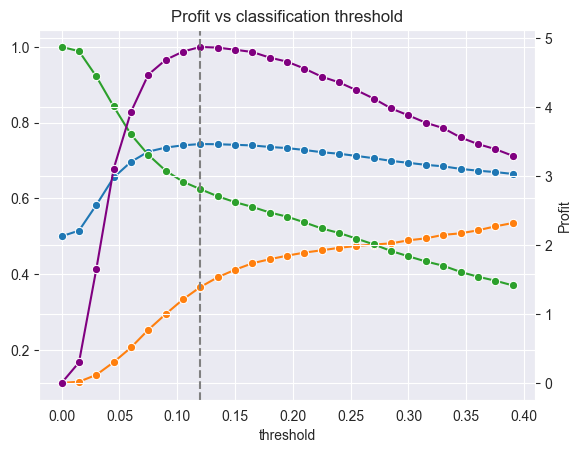

In [62]:
ax1 = plt.subplot()
ax2 = ax1.twinx()

l1 = sns.lineplot(xgb_threshold, x='threshold', y='test_profit_100_11_norm', marker='o', ax=ax1)
l2 = sns.lineplot(xgb_threshold, x='threshold', y='test_precision', marker='o', ax=ax1)
l3 = sns.lineplot(xgb_threshold, x='threshold', y='test_recall', marker='o', ax=ax1).set(ylabel='')

sns.lineplot(xgb_threshold, x='threshold', y='test_profit_100_11', marker='o', ax=ax2, color='purple').set(xlabel ="classification threshold", ylabel = "Profit", title ='Profit vs classification threshold')

plt.axvline(x=0.12, linestyle='--', color='grey')

Final model score

In [63]:
base_model = XGBClassifier()
model = Thresholder(base_model, 0.12)

pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ]
)

# uses stratified kfold
scores = cross_validate(pipeline, X, y, cv=5, scoring=scoring, return_train_score=False, n_jobs=-1)  # Using 5-fold cross-validation
mean_scores = {k: v.mean() for k,v in scores.items()}
pd.Series({**mean_scores})

fit_time                    0.252459
score_time                  0.031840
test_accuracy               0.835850
test_precision              0.366017
test_recall                 0.624353
test_f1                     0.461435
test_profit_100_11          4.868760
test_profit_100_11_norm     0.743527
test_profit_100_90        -10.261485
test_profit_100_90_norm     0.859386
dtype: float64

### Things I've considered but didn't work out
- encodings
- adding poorly correlated columns


### Next steps

- proper grid search
- more feature eng
- 

### sneak peak at encoding

In [27]:
p = preprocessor.fit_transform(X)
preprocessor.get_feature_names_out()
# p.transform(X.head(5))

array(['pipeline-1__age', 'pipeline-1__i1', 'pipeline-1__n4',
       'pipeline-1__n6', 'pipeline-1__i4', 'pipeline-1__i5',
       'pipeline-2__employment_assistant',
       'pipeline-2__employment_cleaner',
       'pipeline-2__employment_customer service',
       'pipeline-2__employment_engineer',
       'pipeline-2__employment_hobbyist',
       'pipeline-2__employment_laborer', 'pipeline-2__employment_leisure',
       'pipeline-2__employment_management', 'pipeline-2__employment_none',
       'pipeline-2__employment_self-employed',
       'pipeline-2__employment_student', 'pipeline-2__employment_unknown',
       'pipeline-2__month_apr', 'pipeline-2__month_aug',
       'pipeline-2__month_dec', 'pipeline-2__month_jul',
       'pipeline-2__month_jun', 'pipeline-2__month_mar',
       'pipeline-2__month_may', 'pipeline-2__month_nov',
       'pipeline-2__month_oct', 'pipeline-2__month_sep',
       'pipeline-2__c4_new', 'pipeline-2__c4_old', 'pipeline-3__c8',
       'pipeline-4__school_numeri

In [28]:
pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out()).head(20)

,pipeline-1__age,pipeline-1__i1,pipeline-1__n4,pipeline-1__n6,pipeline-1__i4,pipeline-1__i5,pipeline-2__employment_assistant,pipeline-2__employment_cleaner,pipeline-2__employment_customer service,pipeline-2__employment_engineer,...,pipeline-2__month_jun,pipeline-2__month_mar,pipeline-2__month_may,pipeline-2__month_nov,pipeline-2__month_oct,pipeline-2__month_sep,pipeline-2__c4_new,pipeline-2__c4_old,pipeline-3__c8,pipeline-4__school_numeric
0,1.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
1,0.0,1.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
2,2.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,1.0,3.0,4.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0
4,1.0,4.0,4.0,0.0,4.0,4.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
5,1.0,3.0,4.0,0.0,3.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.0
6,0.0,1.0,4.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
7,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
8,2.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0
9,0.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0


In [29]:
pd.DataFrame(preprocessor.fit_transform(X), columns=preprocessor.get_feature_names_out())['pipeline-3__c8'].value_counts()

pipeline-3__c8
0.0    35563
1.0     4252
2.0     1373
Name: count, dtype: int64